# Bivariate Analysis
Through bivariate analysis, we try to analyze two variables simultaneously, and see if there is any relationship between them.

There are three possibilities when completing bivariate analysis, and different plot options for each:

*Numerical v. Numerical*

1. Scatter plot
2. Line plot
3. Heat map
4. Joint plot

*Categorical v. Numerical*

1. Bar chart
2. Violin plot
3. Categorical box plot
4. Swarm plot

*Categorical v. Categorical*

1. Bar chart
2. Grouped bar chart
3. Point plot

## Case Study
*Suicide rates overview 1985-2016*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('master.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [4]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
data.shape

(27820, 12)

In [6]:
data.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [9]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False) # total null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) # % null values
    md = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    return md

missing_check(data)

,Total,Percent
HDI for year,19456,0.699353
generation,0,0.000000
gdp_per_capita ($),0,0.000000
gdp_for_year ($),0,0.000000
country-year,0,0.000000
suicides/100k pop,0,0.000000
population,0,0.000000
suicides_no,0,0.000000
age,0,0.000000
sex,0,0.000000


***Describe the continuous data columns only***

In [10]:
data[['suicides_no','population','suicides/100k pop', 'gdp_per_capita ($)']].describe()

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


In [11]:
# Frequency table for age

age_tab = pd.crosstab(index=data['age'], columns='count')
age_tab

col_0,count
age,
15-24 years,4642
25-34 years,4642
35-54 years,4642
5-14 years,4610
55-74 years,4642
75+ years,4642


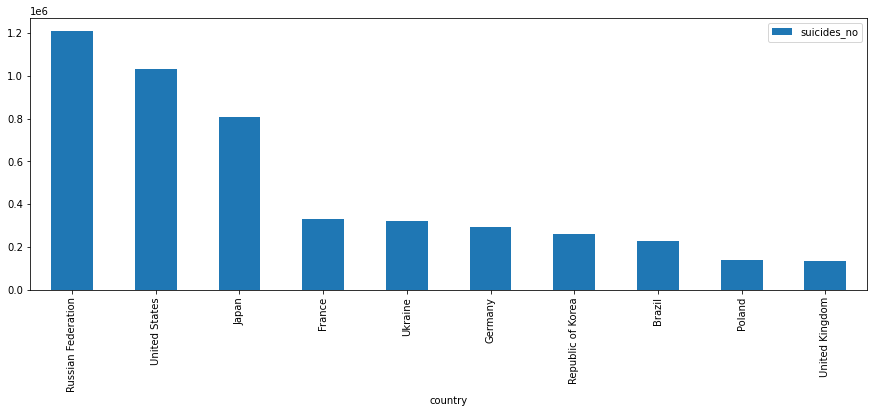

In [17]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'], ascending=False).head(10).plot(x='country', y='suicides_no', kind='bar', figsize=(15,5));

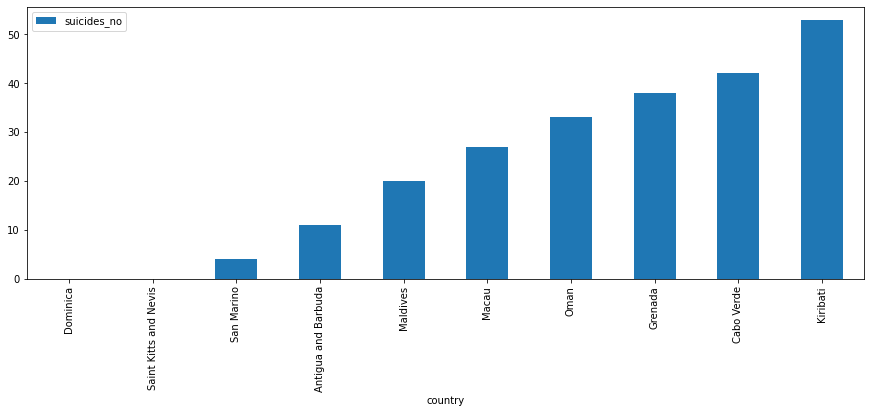

In [18]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).head(10).plot(x='country', y='suicides_no', kind='bar', figsize=(15,5));

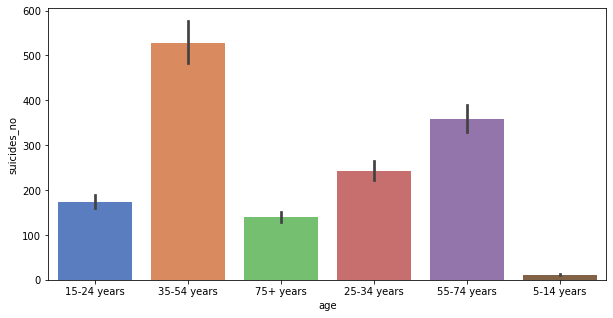

In [19]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='age', y='suicides_no', data=data, palette='muted')

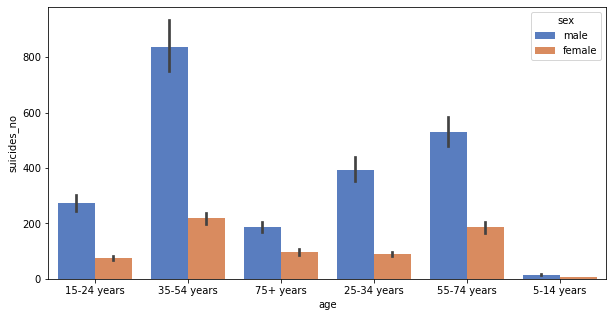

In [21]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='age', y='suicides_no', hue='sex', data=data, palette='muted')

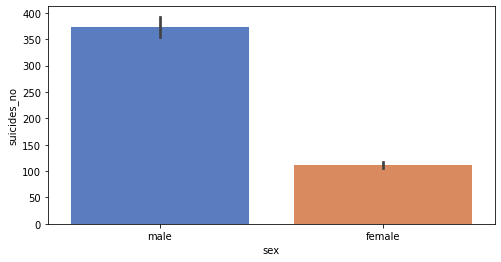

In [23]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x='sex', y='suicides_no', data=data, palette='muted')

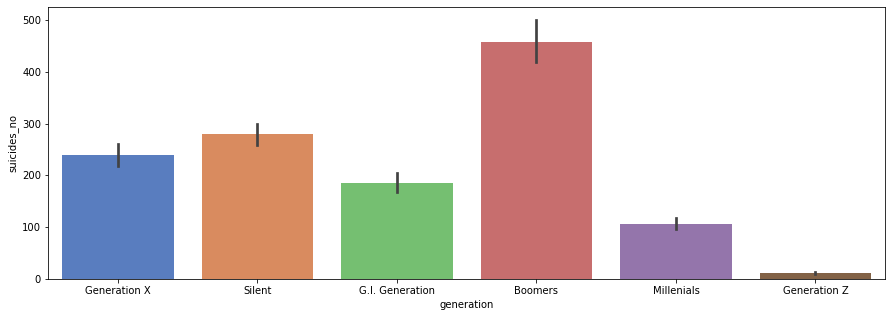

In [24]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='generation', y='suicides_no', data=data, palette='muted')

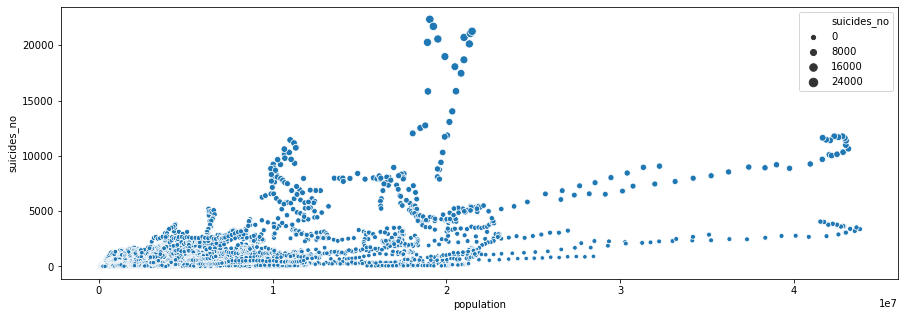

In [28]:
plt.figure(figsize=(15,5))
ax = sns.scatterplot(x='population', y='suicides_no', data=data, size='suicides_no')

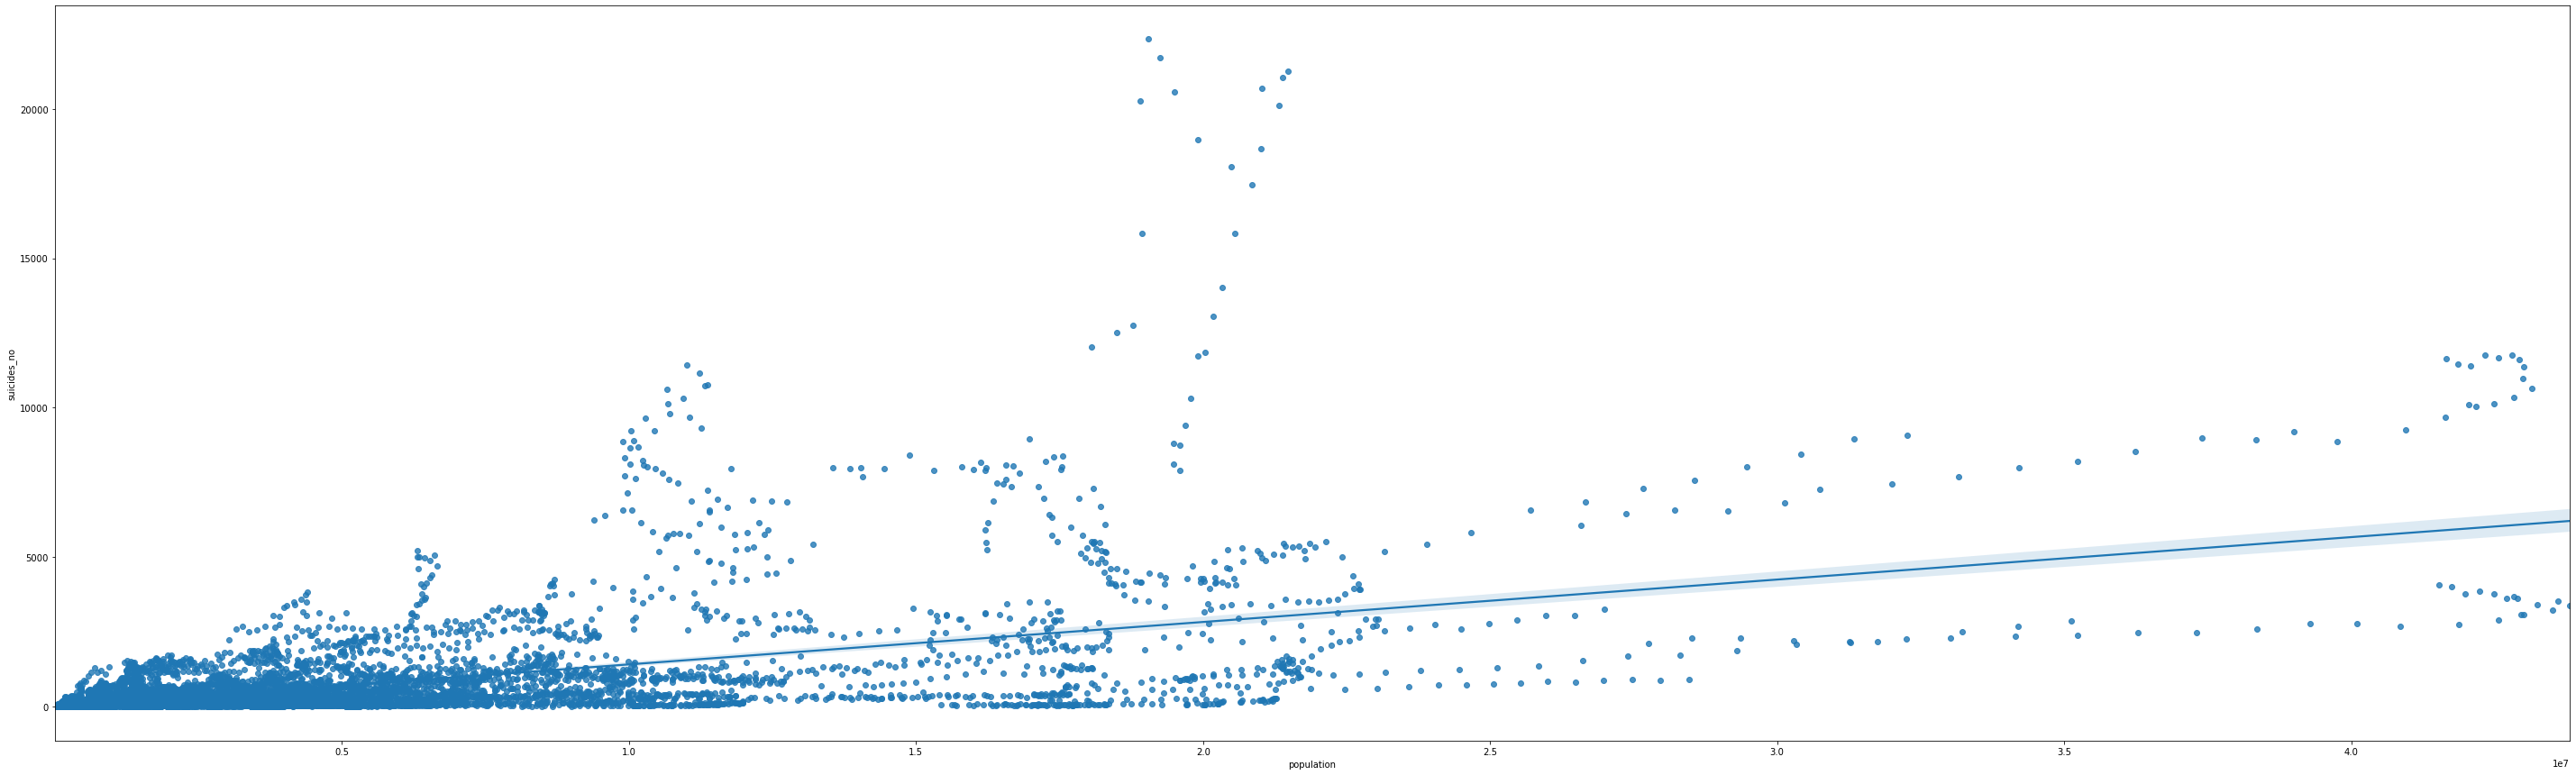

In [40]:
plt.figure(figsize=(50,15))
ax = sns.regplot(x='population', y='suicides_no', data=data)

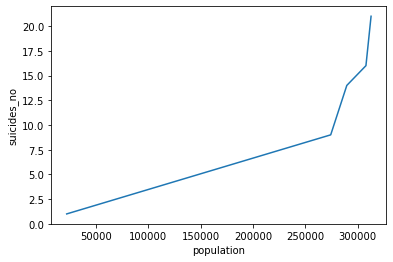

In [37]:
sns.lineplot(x='population',y='suicides_no',data=data.head());

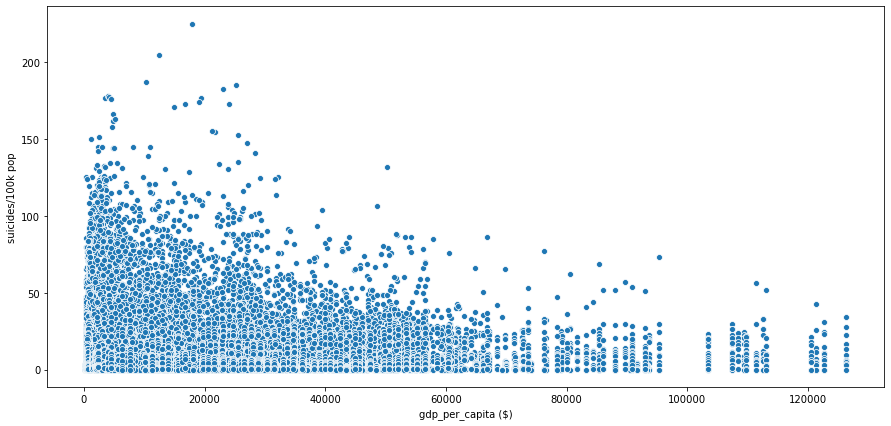

In [39]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=data);

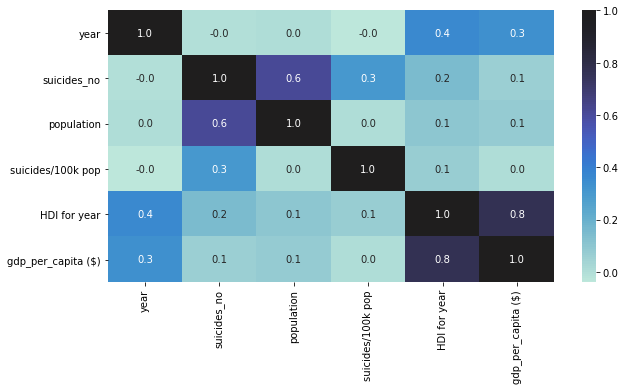

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, fmt='.1f', center=1);

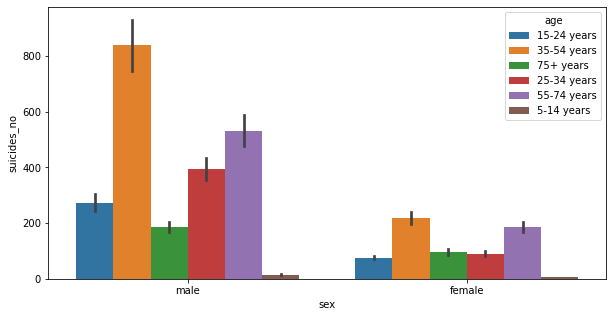

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='sex',y='suicides_no',hue='age');

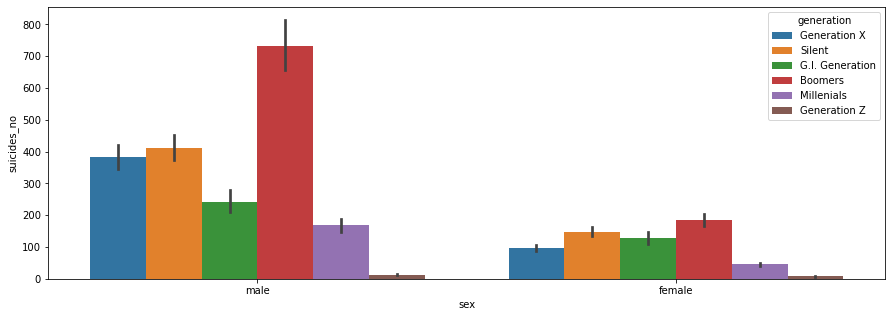

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='sex',y='suicides_no',hue='generation');

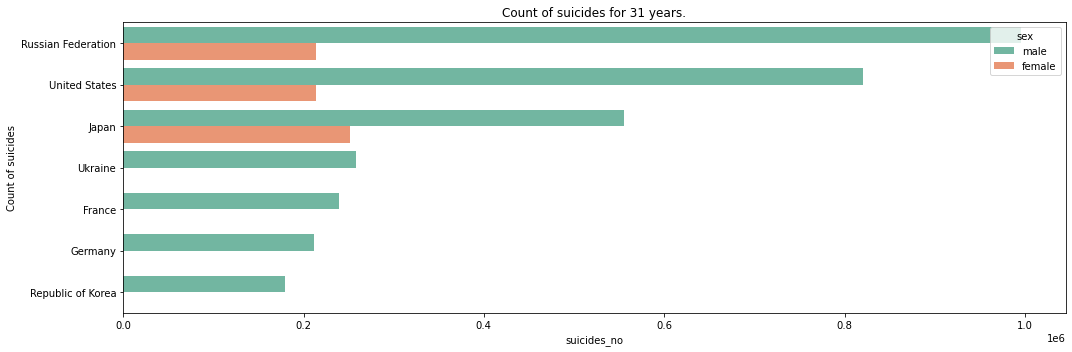

In [46]:
suic_sum_m = data['suicides_no'].groupby([data['country'], data['sex']]).sum()
suic_sum_m = suic_sum_m.reset_index().sort_values(by='suicides_no', ascending=False)
most_cont_m = suic_sum_m.head(10)

fig = plt.figure(figsize=(15,5))
plt.title('Count of suicides for 31 years.')

sns.barplot(y='country', x='suicides_no', hue='sex', data=most_cont_m, palette='Set2');

plt.ylabel('Count of suicides')
plt.tight_layout()

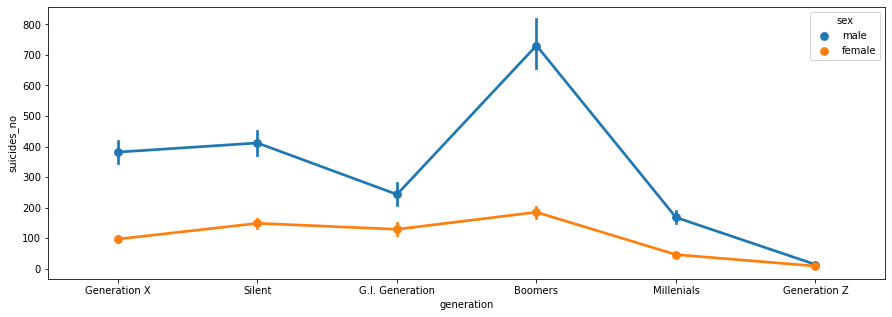

In [47]:
plt.figure(figsize=(15,5))

sns.pointplot(x='generation',y='suicides_no',hue='sex',data=data);

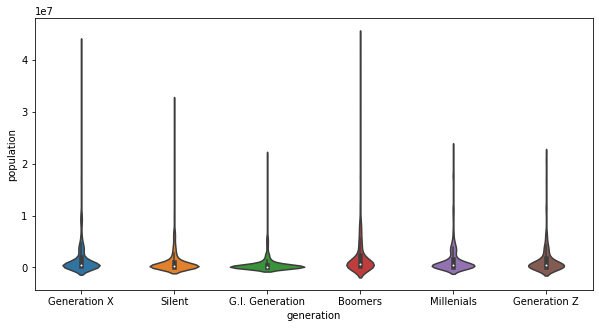

In [48]:
plt.figure(figsize=(10,5))
sns.violinplot(x=data.generation,y=data['population']);

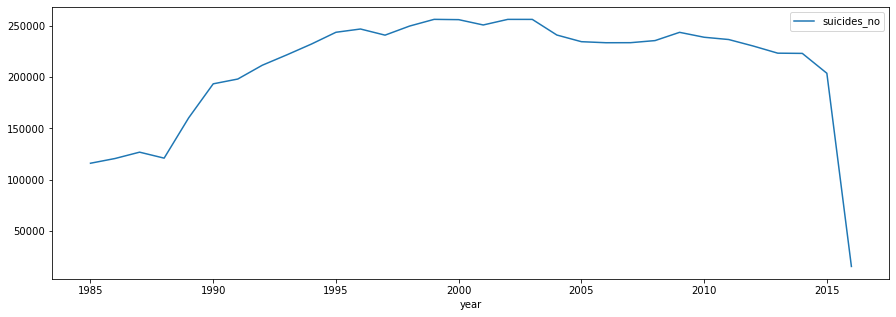

In [49]:
data[['year','suicides_no']].groupby(['year']).sum().plot(figsize=(15,5));

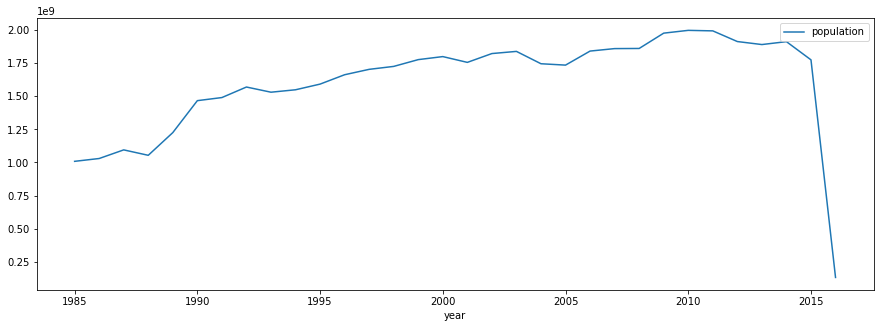

In [50]:
data[['year','population']].groupby(['year']).sum().plot(figsize=(15,5));

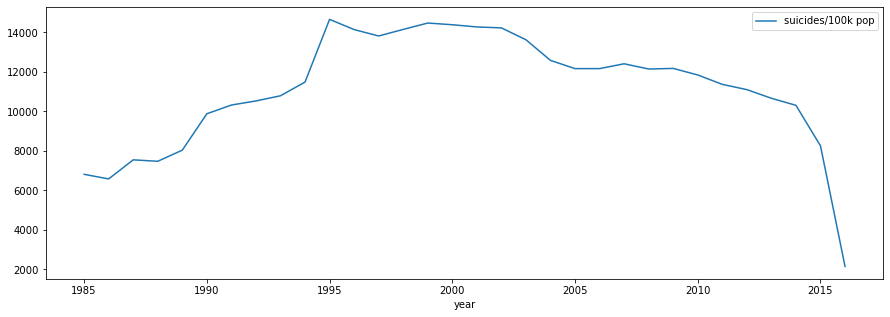

In [51]:
data[['year','suicides/100k pop']].groupby(['year']).sum().plot(figsize=(15,5));